In [1]:
import pandas as pd
import numpy as np

In [2]:
df= pd.read_csv("C:\\Users\\Bharat Batra\\Desktop\\Titanic-Dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.shape

(891, 12)

In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.drop(columns=["PassengerId", "Name", "Ticket"], inplace=True)

In [7]:
df.shape

(891, 9)

In [8]:
miss_value= pd.DataFrame(df.isnull().sum()/len(df)*100)

In [9]:
miss_value

,0
Survived,0.000000
Pclass,0.000000
Sex,0.000000
Age,19.865320
SibSp,0.000000
Parch,0.000000
Fare,0.000000
Cabin,77.104377
Embarked,0.224467


<Axes: title={'center': 'Missing Value Percentage in Each Feature'}, ylabel='Percentage'>

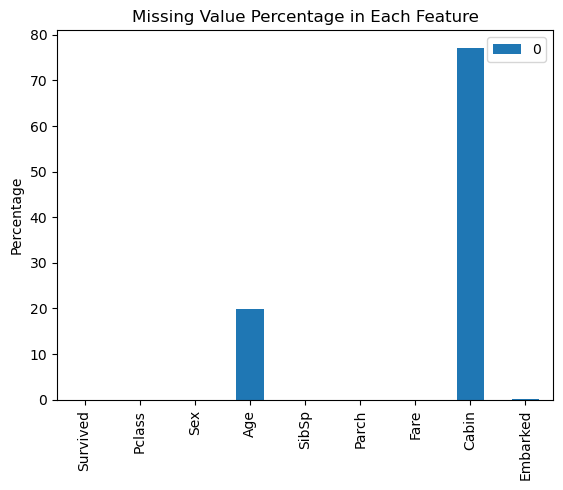

In [10]:
miss_value.plot(title= "Missing Value Percentage in Each Feature", kind= "bar", ylabel="Percentage")

In [11]:
from sklearn.impute import SimpleImputer

In [12]:
df["Age"]= SimpleImputer(strategy= "mean").fit_transform(df[["Age"]])

In [13]:
df["Cabin"]= SimpleImputer(strategy= "most_frequent").fit_transform(df[["Cabin"]])
df["Embarked"]= SimpleImputer(strategy= "most_frequent").fit_transform(df[["Embarked"]])

In [14]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.000000,1,0,7.2500,B96 B98,S
1,1,1,female,38.000000,1,0,71.2833,C85,C
2,1,3,female,26.000000,0,0,7.9250,B96 B98,S
3,1,1,female,35.000000,1,0,53.1000,C123,S
4,0,3,male,35.000000,0,0,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,B96 B98,S
887,1,1,female,19.000000,0,0,30.0000,B42,S
888,0,3,female,29.699118,1,2,23.4500,B96 B98,S
889,1,1,male,26.000000,0,0,30.0000,C148,C


In [15]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [16]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,B96 B98,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,B96 B98,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,B96 B98,S


In [17]:
import seaborn as sns

<Axes: xlabel='Survived', ylabel='Pclass'>

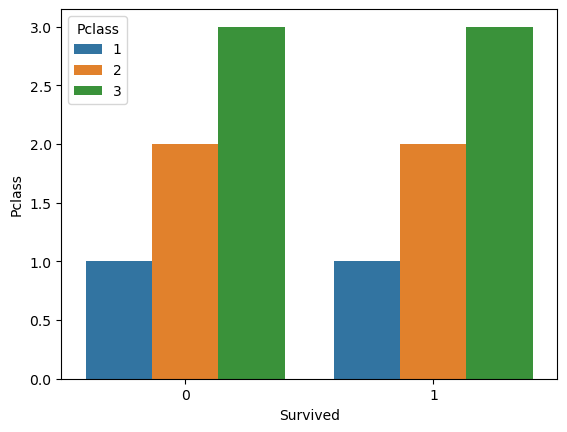

In [18]:
sns.barplot(x= "Survived", y="Pclass", data= df, hue= "Pclass" )

<Axes: title={'center': 'Sex Ratio'}>

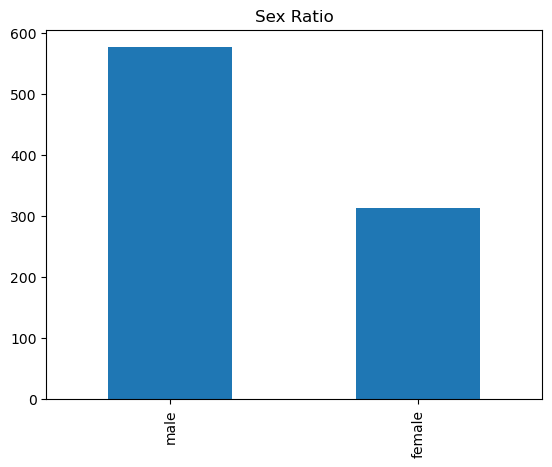

In [19]:
df["Sex"].value_counts().plot(title="Sex Ratio", kind="bar")

In [20]:
from sklearn.preprocessing import OneHotEncoder

In [21]:
df["Sex"]= OneHotEncoder().fit_transform(df[["Sex"]]).toarray()[:,0]

In [22]:
df["Cabin"]= OneHotEncoder(). fit_transform(df[["Cabin"]]).toarray()[:,0]
df["Embarked"]= OneHotEncoder(). fit_transform(df[["Embarked"]]).toarray()[:,0]

In [23]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,0.0,22.000000,1,0,7.2500,0.0,0.0
1,1,1,1.0,38.000000,1,0,71.2833,0.0,1.0
2,1,3,1.0,26.000000,0,0,7.9250,0.0,0.0
3,1,1,1.0,35.000000,1,0,53.1000,0.0,0.0
4,0,3,0.0,35.000000,0,0,8.0500,0.0,0.0
...,...,...,...,...,...,...,...,...,...
886,0,2,0.0,27.000000,0,0,13.0000,0.0,0.0
887,1,1,1.0,19.000000,0,0,30.0000,0.0,0.0
888,0,3,1.0,29.699118,1,2,23.4500,0.0,0.0
889,1,1,0.0,26.000000,0,0,30.0000,0.0,1.0


In [24]:
y= df["Survived"].to_numpy()
df.drop(columns="Survived", inplace= True)

In [25]:
x= df.to_numpy()

In [26]:
x

array([[ 3.        ,  0.        , 22.        , ...,  7.25      ,
         0.        ,  0.        ],
       [ 1.        ,  1.        , 38.        , ..., 71.2833    ,
         0.        ,  1.        ],
       [ 3.        ,  1.        , 26.        , ...,  7.925     ,
         0.        ,  0.        ],
       ...,
       [ 3.        ,  1.        , 29.69911765, ..., 23.45      ,
         0.        ,  0.        ],
       [ 1.        ,  0.        , 26.        , ..., 30.        ,
         0.        ,  1.        ],
       [ 3.        ,  0.        , 32.        , ...,  7.75      ,
         0.        ,  0.        ]])

In [27]:
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [29]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size= 0.2, random_state=74)

reg= LogisticRegression(max_iter=500)

In [30]:
reg.fit(x_train, y_train)

prediction= reg.predict(x_test)

In [32]:
prediction

array([0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0], dtype=int64)

In [33]:
accuracy= accuracy_score(y_test, prediction)

In [34]:
accuracy

0.8324022346368715